In [12]:
# Necessary imports

import math
import numpy as np
from stl import mesh
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import pyplot

exception (False, 'No lines found, impossible to read')


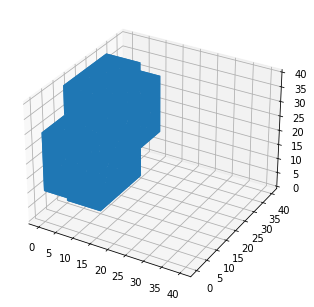

In [13]:
# Load an existing stl file:
my_mesh = mesh.Mesh.from_file('Plus.stl')

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(my_mesh.vectors))

# Auto scale to the mesh size
scale = my_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

exception (False, 'No lines found, impossible to read')
DATA : {(40.0, 25.0), (20.0, 25.0), (0.0, 15.0), (0.0, 25.0), (40.0, 0.0), (20.0, 0.0), (60.0, 15.0), (40.0, 40.0), (20.0, 40.0), (20.0, 15.0), (60.0, 25.0), (40.0, 15.0)}
x_centre : 30.0
y_centre : 20.0
MIN Y : inf
MAX Y : -inf


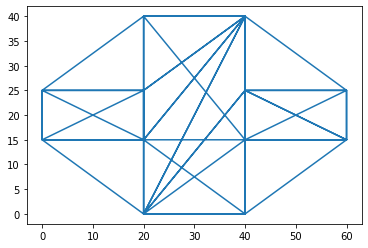

In [14]:
my_mesh = mesh.Mesh.from_file('Plus2.stl');
#use 10 as z-index


xarr = list()
yarr = list()
dataset = set()
# z_index = float(input())
z_index = 10.0;

for vec in my_mesh.vectors:
    for i in vec:
        if abs(i[0]-z_index)<0.01:
            xarr.append(i[2])
            yarr.append(i[1])
            dataset.add((i[2],i[1]))

x_centre = 0
y_centre = 0
min_y = float("inf")
max_y = -float("inf")
for d in dataset:
    x_centre+=d[0]
    y_centre+=d[1]


try:
    x_centre/=len(dataset)
    y_centre/=len(dataset)
except ZeroDivisionError as e:
    print("ERROR : Division by zero.\nList of vertices has no elements. Make sure to enter correct z-index")


print("DATA :",dataset)
print("x_centre :",x_centre)
print("y_centre :",y_centre)
print("MIN Y :", min_y)
print("MAX Y :", max_y)

plt.plot(xarr,yarr)

In [15]:
def angularPos(centre, p2):
    m = abs((p2[1]-centre[1])/(p2[0]-centre[0]))
    angle =  math.atan(m)/math.pi*180

    if(p2[0]>=centre[0]):
        if(p2[1]>=centre[1]):
            return angle
        else:
            return 360-angle
    else:
        if(p2[1]>=centre[1]):
            return 180-angle
        
        else:
            return 180+angle


angularPos((0,0),(1,-1))

315.0

In [16]:
centre = (x_centre,y_centre)
data = list()
for d in dataset:
    angle = angularPos(centre,d)
    data.append((angle,d[0],d[1]))

print(data)

[(26.565051177077986, 40.0, 25.0), (153.43494882292202, 20.0, 25.0), (189.46232220802563, 0.0, 15.0), (170.53767779197437, 0.0, 25.0), (296.565051177078, 40.0, 0.0), (243.43494882292202, 20.0, 0.0), (350.5376777919744, 60.0, 15.0), (63.43494882292201, 40.0, 40.0), (116.56505117707799, 20.0, 40.0), (206.56505117707798, 20.0, 15.0), (9.462322208025618, 60.0, 25.0), (333.434948822922, 40.0, 15.0)]


[(9.462322208025618, 60.0, 25.0), (26.565051177077986, 40.0, 25.0), (63.43494882292201, 40.0, 40.0), (116.56505117707799, 20.0, 40.0), (153.43494882292202, 20.0, 25.0), (170.53767779197437, 0.0, 25.0), (189.46232220802563, 0.0, 15.0), (206.56505117707798, 20.0, 15.0), (243.43494882292202, 20.0, 0.0), (296.565051177078, 40.0, 0.0), (333.434948822922, 40.0, 15.0), (350.5376777919744, 60.0, 15.0)]


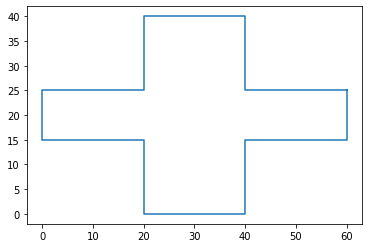

In [17]:
data.sort(key= lambda x:x[0])
print(data)
x=[]
y=[]
for i in data:
    x.append(i[1])
    y.append(i[2])

x.append(data[0][1])
y.append(data[0][2])
plt.plot(x,y);

In [18]:
def blockDistData(data,centre,block_thickness):
    upper_blocks =  list()
    lower_blocks =  list()
    for i in range(1,len(data)):
        p0 = data[i-1]
        p1 = data[i]

        if ((p1[1]-p0[1])!=0):
            if(p1[2]>=centre[1]):
                x_dist = p0[1]-p1[1]
                avg_y = (p1[2]+p0[2])/2

                while(x_dist):
                    upper_blocks.append(avg_y-centre[1])
                    x_dist -= block_thickness

            else:
                x_dist = p1[1]-p0[1]
                avg_y = (p1[2]+p0[2])/2
                while(x_dist):
                    lower_blocks.append(avg_y-centre[1])
                    x_dist -= block_thickness


    upper_blocks = upper_blocks[::-1]
    print("UPPER BLOCKS :",upper_blocks)
    print("LOWER BLOCKS :",lower_blocks)
    return (upper_blocks, lower_blocks)


blockDistData(data,centre,10);

UPPER BLOCKS : [5.0, 5.0, 20.0, 20.0, 5.0, 5.0]
LOWER BLOCKS : [-5.0, -5.0, -20.0, -20.0, -5.0, -5.0]
